# TOS2CA Binder for Plotting Interpolated Data
This Jupyter notebook shows how to plot a specific anomaly at a specific timestep, with an interpolated file from the [TOS2CA system](https://nasa-jpl.github.io/tos2ca-documentation/).

## Import libraries
At a minimum, we will need:
* netCDF4
* numpy
* matplotlib

We'll import them in the cell below.  See the requirements.txt file for additional information.

In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt

## Open the file
Next, we'll open the sample interpolated file, using the netCDF4 library.  This file uses jobID #398 from the TOS2CA system, as you can see in the first part of the filename.  

This sample data happens to be from the NASA Global Precipitation Monitor's [GPM_3IMERGHH](https://disc.gsfc.nasa.gov/datasets/GPM_3IMERGHH_07/summary?keywords=GPM_3IMERGHH) data set, and shows the `precipitation` variable.

In [2]:
filename = 'sample_data/398-Interpolated-Data.nc4'
ncfile_out = Dataset(filename,"r+", format="NETCDF4")

## Select a timestamp and anomaly
There can be several timestamps in an interpolated file, and each timestamp will have data for each anomaly that was active at that time.  Timestamps will be in YYYYMMDDHHMM format. Here we identify the timestamp and anomaly number we are interested in.  

In this example, we'll use 01-04-2020 07:30 as the timestamp, and anomaly #15.

In [3]:

timestamp = '202001040730'
anomaly_n = '15'

## Read the data
Now we take the `ncfile_out` variable (which is the open netCDF-4 interpoalated file) and select the timestamp, group, the anomaly group, and the variable (`precipitation` in this case -- there is only one variable per interpolated file).

In [4]:
data = ncfile_out[timestamp].groups[anomaly_n].variables[ncfile_out.Variable][...].data
lat_array = data[:, 0]
lon_array = data[:, 1]

data_array = np.where(data[:, 2]>=0, data[:, 2], np.nan)

## Plot the data
Using matplotlib, we'll setup the plot and show the data!  Note that it will grab some metadata to figure out things like the units the variable is in.

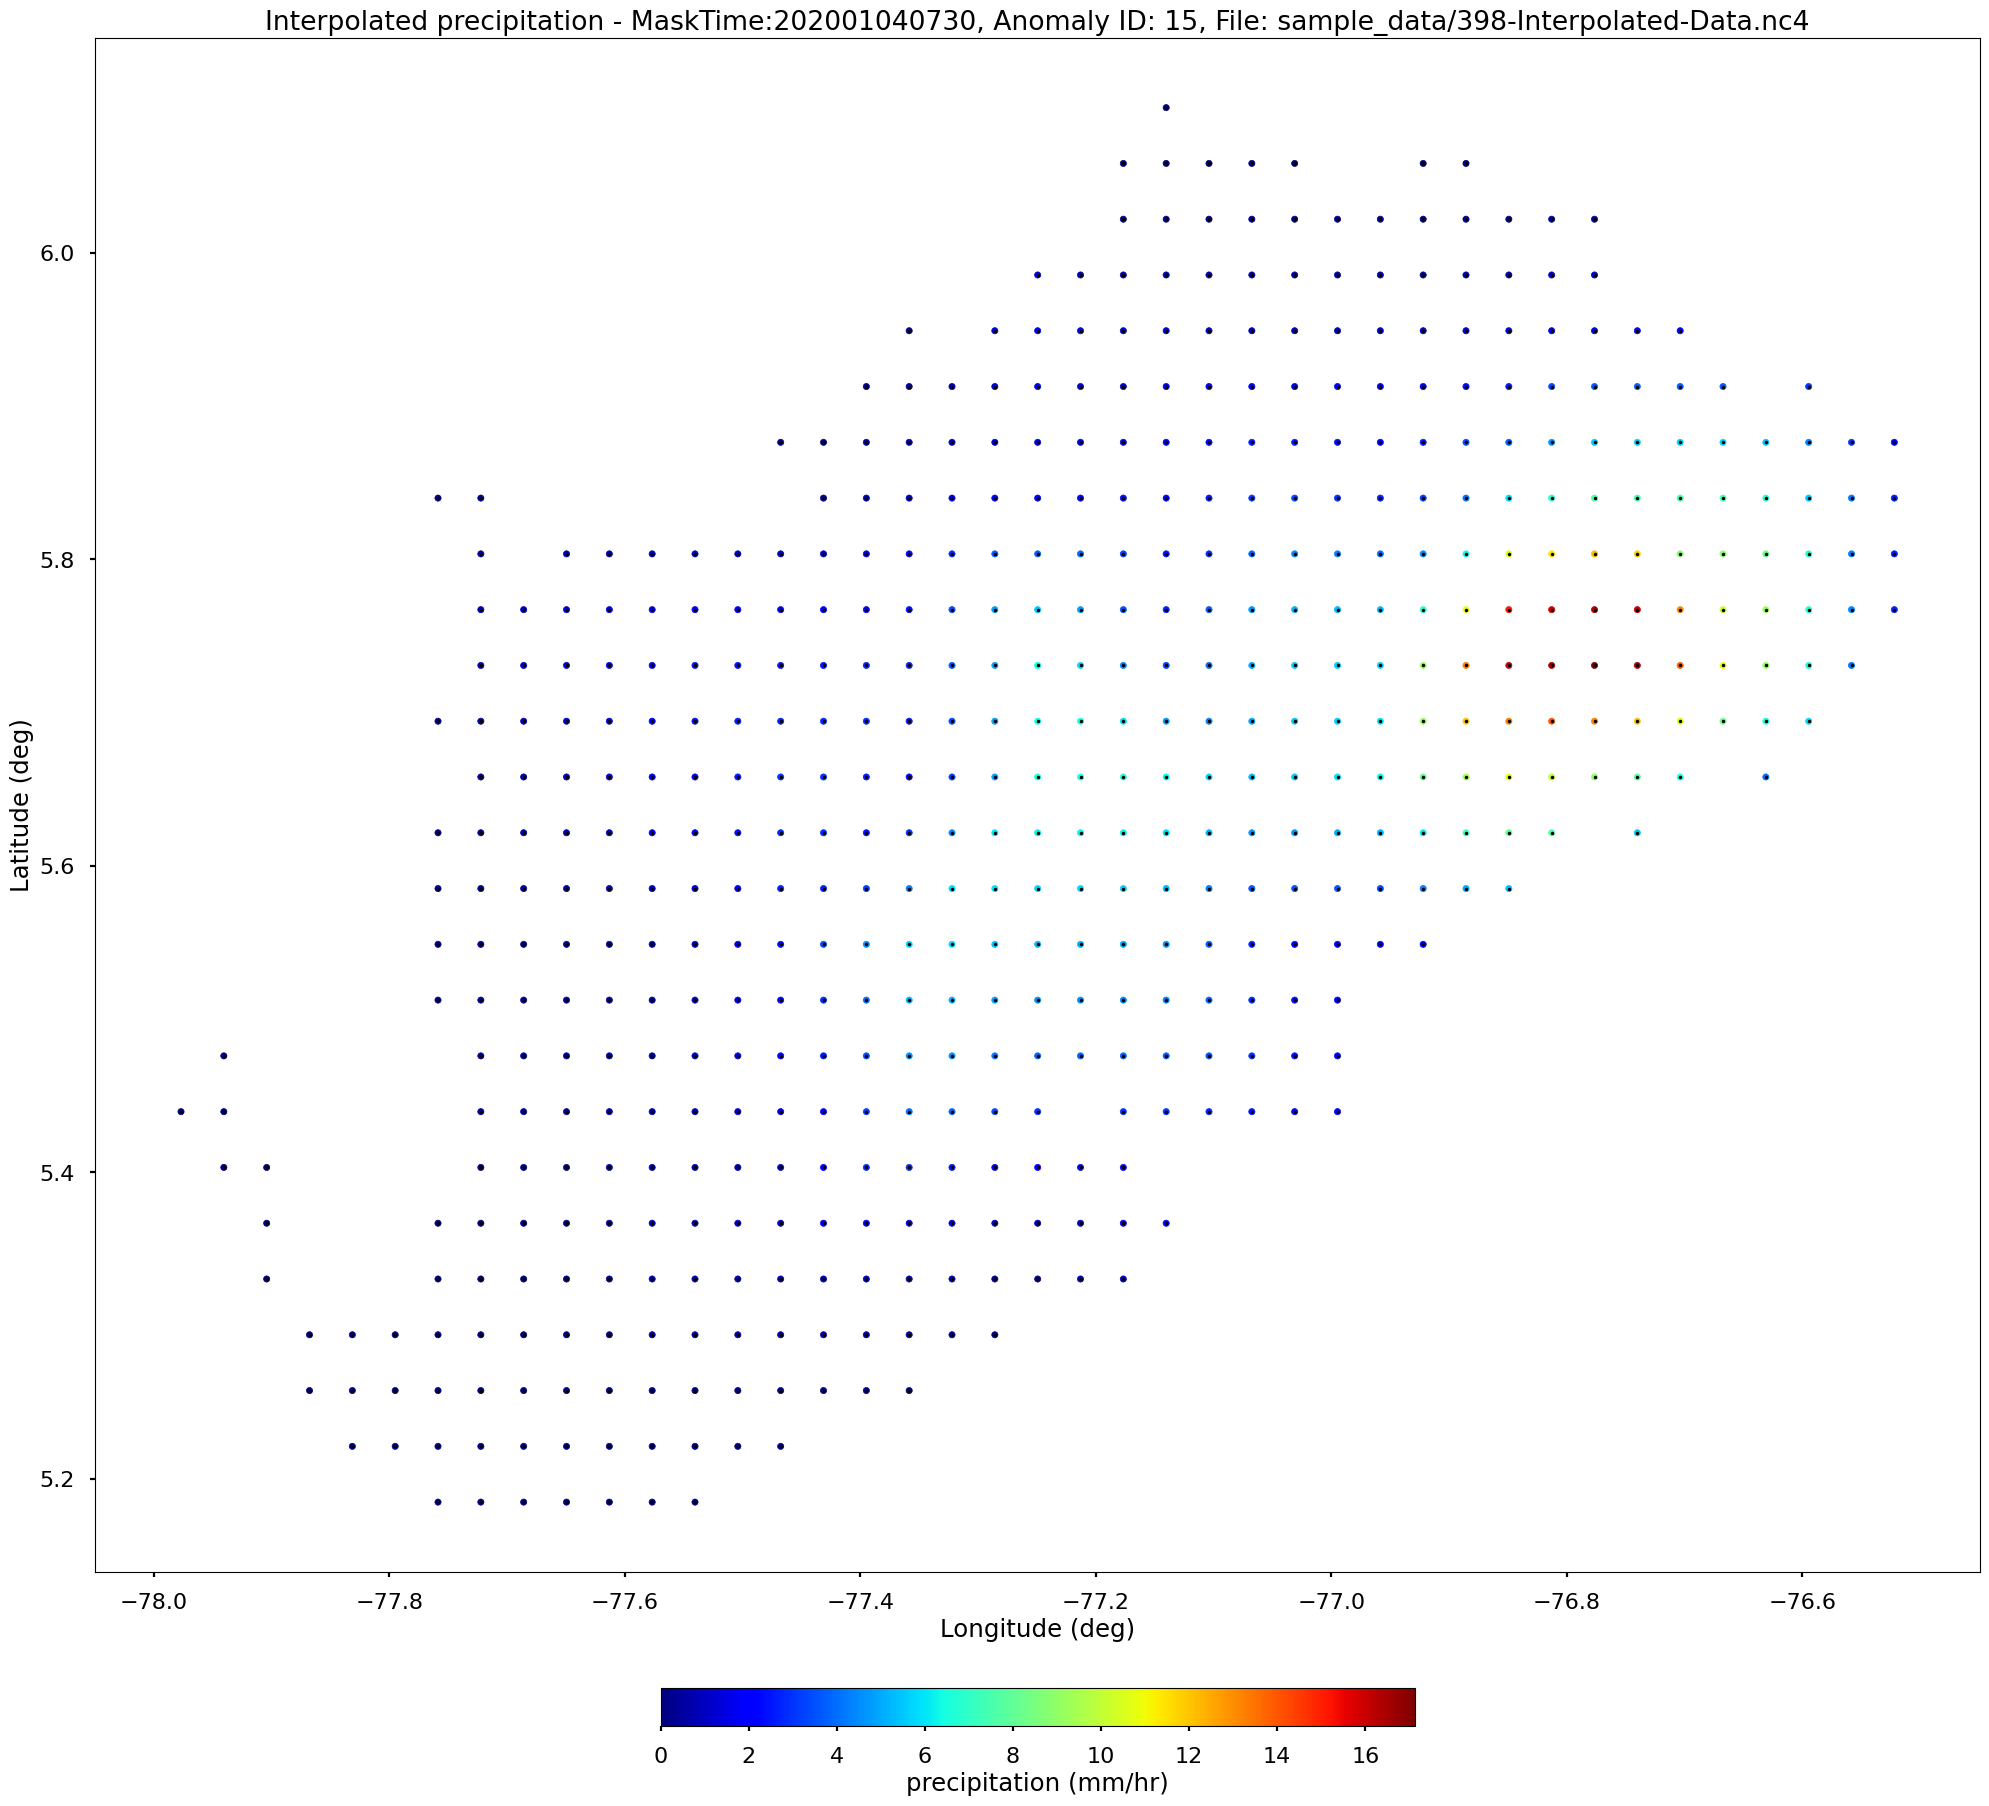

In [5]:
plt.style.use(['seaborn-v0_8-poster'])

fig = plt.figure(figsize=(20,20))
ax = plt.subplot(111)

plt.plot(lon_array, lat_array,  '.k', markersize = 5)
plt.scatter(lon_array, lat_array, s = 20, c= data_array,cmap = 'jet')

plt.title('Interpolated '+ncfile_out.Variable+' - MaskTime:'+timestamp+', Anomaly ID: ' + str(anomaly_n)+', File: '+filename )
plt.colorbar(label = ncfile_out.Variable + ' ('+ncfile_out.Units+')', orientation =  'horizontal', shrink = 0.4, pad = 0.06)
plt.ylabel('Latitude (deg)')
plt.xlabel('Longitude (deg)')
plt.tight_layout()
plt.show()